<a href="https://colab.research.google.com/github/dklpp/tf-developer/blob/main/TF_Keras_Developer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Fitting a straight line

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
x = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
y = np.array([-3, -1, 1, 3, 5, 7], dtype=float)

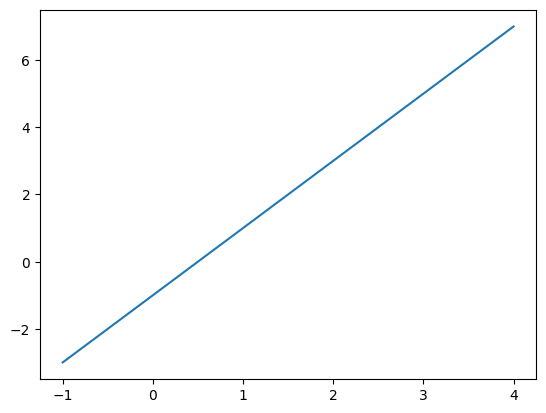

In [ ]:
plt.plot(x, y);

In [ ]:
history = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 0.0020
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0020
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 8/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0018
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 0.0017
Epoch 10/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 13/500
1/1 [==============================]

In [ ]:
print(model.predict([10.0, 2.0]))

1/1 [==============================] - 0s 59ms/step
[[18.999252 ]
 [ 3.0001192]]


In [ ]:
history.history.keys()

dict_keys(['loss'])

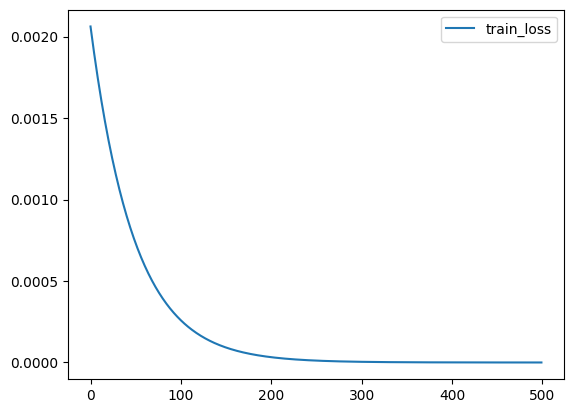

In [ ]:
train_loss = history.history['loss']
plt.plot(train_loss, label='train_loss');
plt.legend();

# Week 2. Computer Vision with Fashion MNIST

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_images.shape # 60000 examples of 28x28 pixel images

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Print a training image

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

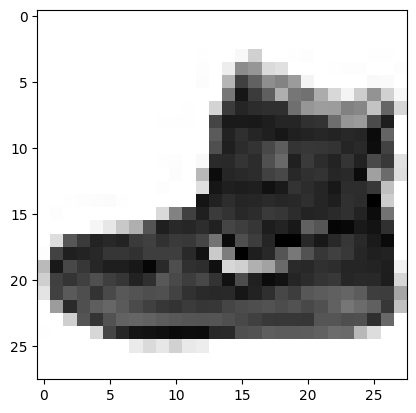

In [ ]:
index = 0

# set number of characters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

# visualize the image
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu), # activation='relu'
    keras.layers.Dense(10, activation=tf.nn.softmax) # activation='softmax'
])

# Normalize the data
- it's better for NN

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Softmax

In [ ]:
# Declare sample inputs and convert to a Tensor
inputs = np.array([[1, 3, 4, 2]], dtype=float)
inputs = tf.convert_to_tensor(inputs)
print(f'Input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax function
outputs = tf.keras.activations.softmax(inputs)
print(f'Output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'Sum of outputs: {sum}')

# Get the index with the hights value
prediction = np.argmax(outputs)
print(f'Class with highest probability: {prediction}')


Input to softmax function: [[1. 3. 4. 2.]]
Output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
Sum of outputs: 1.0
Class with highest probability: 2


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2814 - accuracy: 0.8947
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9007
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9042
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2462 - accuracy: 0.9083
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2386 - accuracy: 0.9118
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2288 - accuracy: 0.9143
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2226 - accuracy: 0.9163
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2146 - accuracy: 0.9188
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2098 - accuracy: 0.9218
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.202

In [ ]:
# Evaluate the model on unseen data

model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8896


[0.3362082839012146, 0.8895999789237976]

In [ ]:
classifications = model.predict(test_images)

print(classifications[1])

313/313 [==============================] - 1s 3ms/step
[9.1794305e-07 6.8303850e-17 9.9988097e-01 2.7853800e-12 1.0324355e-04 5.9907100e-15 1.4822935e-05 5.0172362e-24 3.0260976e-12 8.2632531e-17]


In [ ]:
print(test_labels[1]) # 9.99 * 10^-1 - the biggest among the others

2


# Different NN Architecture

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4754 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3571 - accuracy: 0.8706
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3242 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3012 - accuracy: 0.8887
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[6.1245333e-07 2.6479665e-07 1.5760657e-08 1.4747615e-09 5.9466597e-08 2.5868278e-03 5.7312764e-07 3.7241451e-02 2.1244487e-07 9.6016997e-01]
9


In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 4.4531
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5416
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5145
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5117
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.5060226e-16 1.6192367e-09 1.1568298e-21 4.3295225e-11 2.2990539e-19 3.9443152e-04 1.1845214e-12 1.4651661e-02 1.8883957e-12 9.8495394e-01]
9


# Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}): # it's called whenever the epoch ends
    #if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
    if(logs.get('loss') <= 0.4):
      print('\nReached loss=0.4 or less so cancelling training!')
      #print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Define a Model with Callback

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
model.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4770 - accuracy: 0.8311
Epoch 2/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8695
Reached loss=0.4 or less so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3576 - accuracy: 0.8694


# Week 3. Convolutional Neural Networks.
- Conv2D and MaxPooling Layers.
- Usually convolutional layer is followed by Pooling Layer (Max/Avg)
- The convolutions filter it to the features that determine the output.
- Pooling compresses the information to make it more manageable.

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                           input_shape=(28, 28, 1)), # 1 stands 1 byte. (1 color scale - gray)
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Fashion Classifier with Convolutions

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


# Shallow Neural Network

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4981 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3711 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3339 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8919

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8722


# Convolutional Neural Network

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4762 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3223 - accuracy: 0.8816
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2788 - accuracy: 0.8974
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2482 - accuracy: 0.9092
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2233 - accuracy: 0.9165

MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2755 - accuracy: 0.8996


# Visualizing the Convolutions and Pooling
- 1st conv - 1st pool - 2nd conv - 2nd pool
- size of the image is changed (look at the axes numbers)

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [ ]:
test_labels[[0, 23, 28]]

array([9, 9, 9], dtype=uint8)

In [ ]:
[layer.output for layer in model.layers]

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

1/1 [==============================] - 0s 28ms/step


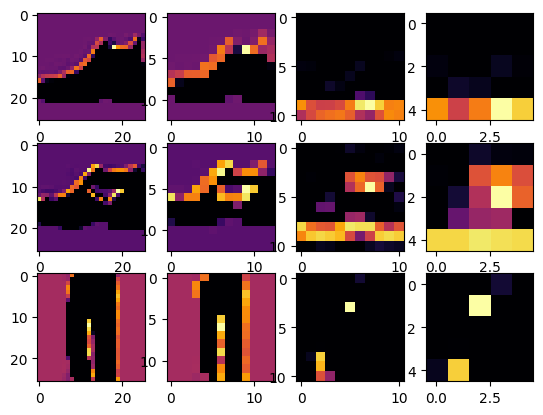

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

# Try different images, convolutions.
# See what different convolutions capture from the similar/diffrent images.

FIRST_IMAGE=0 # (0,23,28) ; (0,23,1) ; (0,23,2)
SECOND_IMAGE=23
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 1 # total : 64 ?

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)